In [1]:
#%%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.filterwarnings("ignore")
data = pd.read_csv('aug_train.csv')
data_train,data_test = train_test_split(data,test_size=0.3)
data_test = pd.DataFrame(data=data_test,columns = data_train.columns)

#%%
data.head(5)

# Data preprocessing

#%%

import copy
df_train=copy.deepcopy(data_train)
df_test=copy.deepcopy(data_test)

cols=np.array(data_train.columns[data.dtypes != object])
all_columns = df_train.columns
for i in all_columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)
df_train.columns

#%%

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data_train.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)
# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols]=data[cols]

#%%

df_test = df_test.apply(lambda x: d[x.name].fit_transform(x))

#%%

df_train[cols]=data[cols]
#%%

df_test[np.delete(cols,len(cols)-1)]=data_test[np.delete(cols,len(cols)-1)]
df_test

#%%

# Heat map for training data set

#%%

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

#%%

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = df_train.corr()
sns.heatmap(corr[(corr.abs() > 0.01)], cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

#%%

#visualizing the features whigh positive and negative correlation

#%%

f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

f.suptitle('Features With High Positive & Negative Correlation', size=35)
sns.boxplot(x="target", y="city", data=df_train, ax=axes[0,0])
sns.boxplot(x="target", y="gender", data=df_train, ax=axes[0,1])
sns.boxplot(x="target", y='relevent_experience', data=df_train, ax=axes[0,2])
sns.boxplot(x="target", y='enrolled_university', data=df_train, ax=axes[1,0])
sns.boxplot(x="target", y='education_level', data=df_train, ax=axes[1,1])
sns.boxplot(x="target", y='company_size', data=df_train, ax=axes[1,2])
sns.boxplot(x="target", y='company_type', data=df_train, ax=axes[2,0])
sns.boxplot(x="target", y='enrollee_id', data=df_train, ax=axes[2,1])
sns.boxplot(x="target", y='training_hours', data=df_train, ax=axes[2,2])

#%%

# Create ML algorithm to balance data
# ......................

#%%

ftrain = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours', 'target']
ftest = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours']

def Definedata():
    # define dataset
    data2=df_train[ftrain]
    X=data2.drop(columns=['target']).values
    y=data2['target'].values
    return X, y
def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    oversample = SMOTE()
    X, y = oversample.fit_sample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

#%%

def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

#%%

def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = SVMSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

#%%

def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

#%%

# Modeling
# ......................

#%%

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import seaborn 
import matplotlib.pyplot as plt

def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total career swith = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
    g2.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
    g3.set_ylabel('Total career swith = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score Totalset: {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)

def Featureimportances(models, title):
    model = models
    model.fit(X_train2,y_train2)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp.style.set_caption(title)
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

#%%

X_train2, X_test2, y_train2, y_test2 = BSMOTE()
X_train3, X_test3, y_train3, y_test3 = SMOTESVM()
X_train4, X_test4, y_train4, y_test4 = ADASYN()

#%%

# Bsmote logistic reression

#%%

title = "LogisticRegression/BSMOTE"
Models(LogisticRegression(),X_train2, X_test2, y_train2, y_test2, title)

#%%

title = "LogisticRegression/SMOTESVM"
Models(LogisticRegression(),X_train3, X_test3, y_train3, y_test3, title)

#%%

title = "LogisticRegression/ADASYN"
Models(LogisticRegression(),X_train4, X_test4, y_train4, y_test4, title)

#%%

# Decission tree
# .............................

#%%

title = "DecisionTreeClassifier/ADASYN"
Models(DecisionTreeClassifier(max_depth=14),X_train4, X_test4, y_train4, y_test4, title)
Featureimportances(DecisionTreeClassifier(max_depth=14), "Feature importance ")

#%%




FileNotFoundError: ignored

In [ ]:
#%%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.filterwarnings("ignore")
data = pd.read_csv('aug_train.csv')
data_train,data_test = train_test_split(data,test_size=0.3)
data_test = pd.DataFrame(data=data_test,columns = data_train.columns)

#%%
data.head(100)
data.dtypes
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
data.corr()


,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


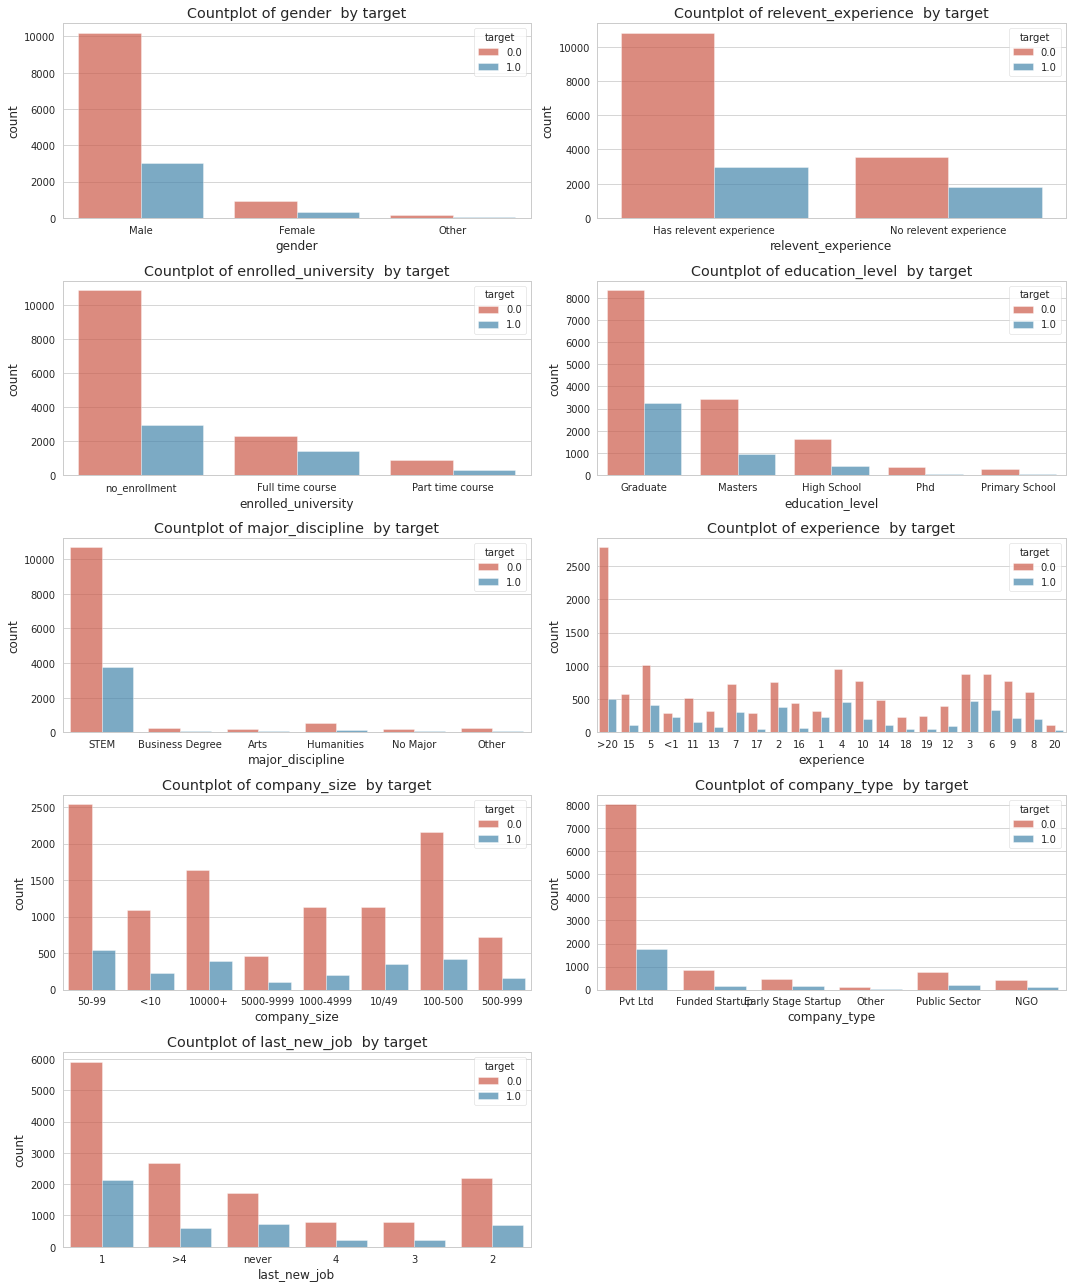

There were 14381 nonot_change (75.065%) and 4777 change (24.935%).


NameError: ignored

In [ ]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
feafures = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in feafures:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

#Churn vs. normal 
counts = data.target.value_counts()
not_change = counts[0]
change = counts[1]
perc_not_change = (not_change/(not_change+change))*100
perc_change = (change/(not_change+change))*100
print('There were {} nonot_change ({:.3f}%) and {} change ({:.3f}%).'.format(not_change, perc_not_change, change, perc_change))
np.array(data.columns[data.dtypes != object])



In [ ]:
import copy
df_train=copy.deepcopy(data)


cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
       
df_train.drop(columns=cols,inplace=True)
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols]=data[cols]
df_train.dtypes

city                        int64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
enrollee_id                 int64
city_development_index    float64
training_hours              int64
target                    float64
dtype: object

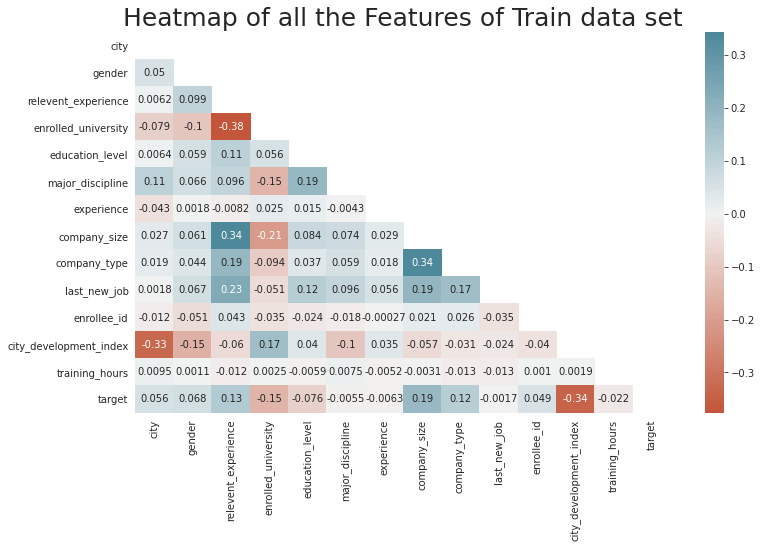

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

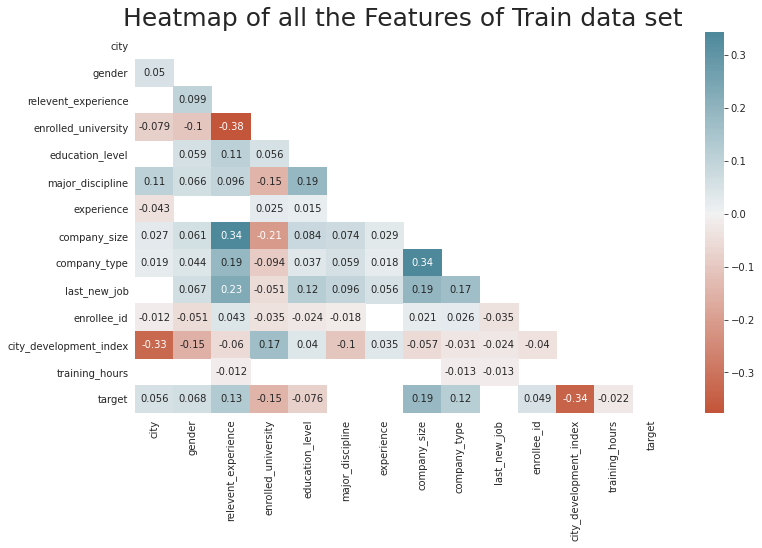

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = df_train.corr()
sns.heatmap(corr[(corr.abs() > 0.01)], cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

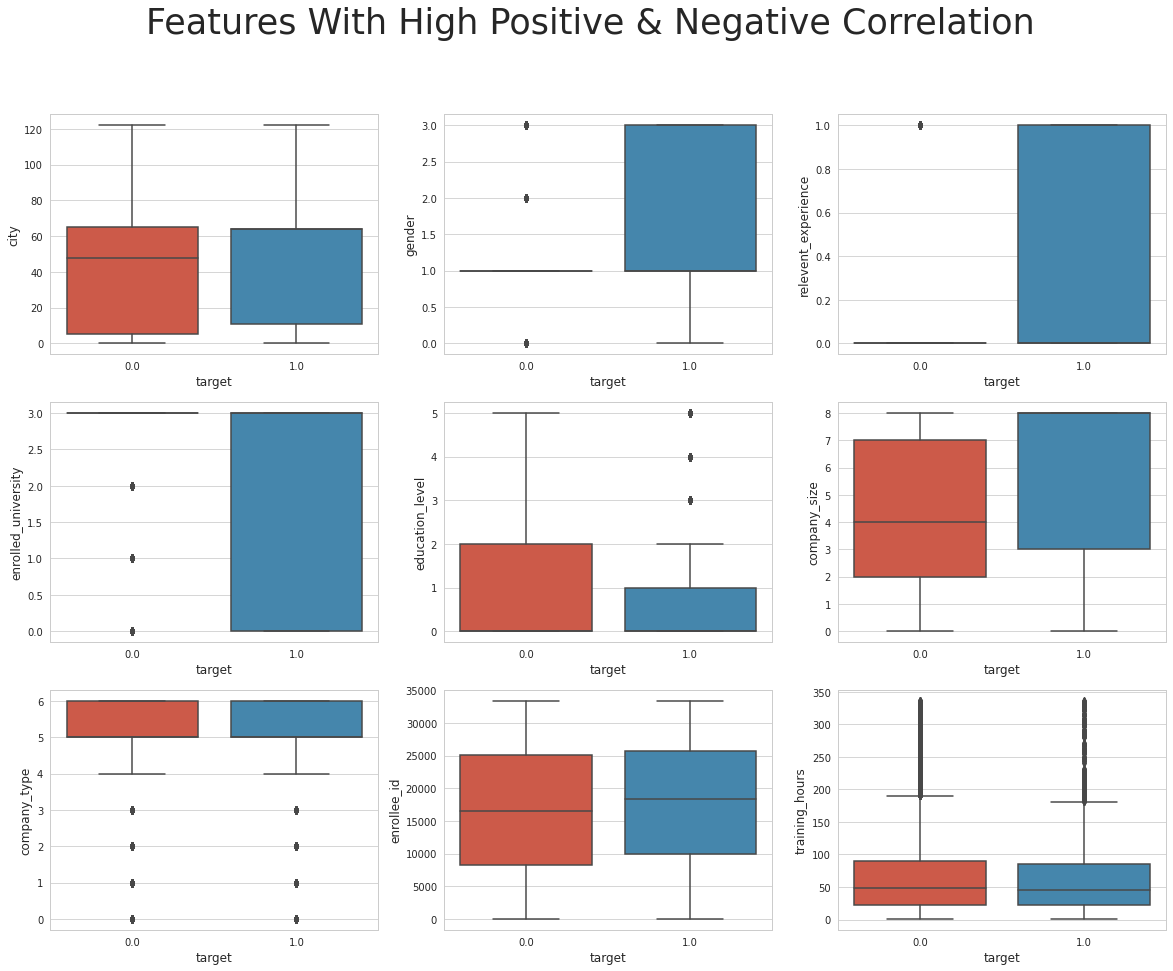

In [ ]:
#visualizing the features whigh positive and negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

f.suptitle('Features With High Positive & Negative Correlation', size=35)
sns.boxplot(x="target", y="city", data=df_train, ax=axes[0,0])
sns.boxplot(x="target", y="gender", data=df_train, ax=axes[0,1])
sns.boxplot(x="target", y='relevent_experience', data=df_train, ax=axes[0,2])
sns.boxplot(x="target", y='enrolled_university', data=df_train, ax=axes[1,0])
sns.boxplot(x="target", y='education_level', data=df_train, ax=axes[1,1])
sns.boxplot(x="target", y='company_size', data=df_train, ax=axes[1,2])
sns.boxplot(x="target", y='company_type', data=df_train, ax=axes[2,0])
sns.boxplot(x="target", y='enrollee_id', data=df_train, ax=axes[2,1])
sns.boxplot(x="target", y='training_hours', data=df_train, ax=axes[2,2])

Text(0.5, 1.0, 'Heatmap of all the Features of Test data set')

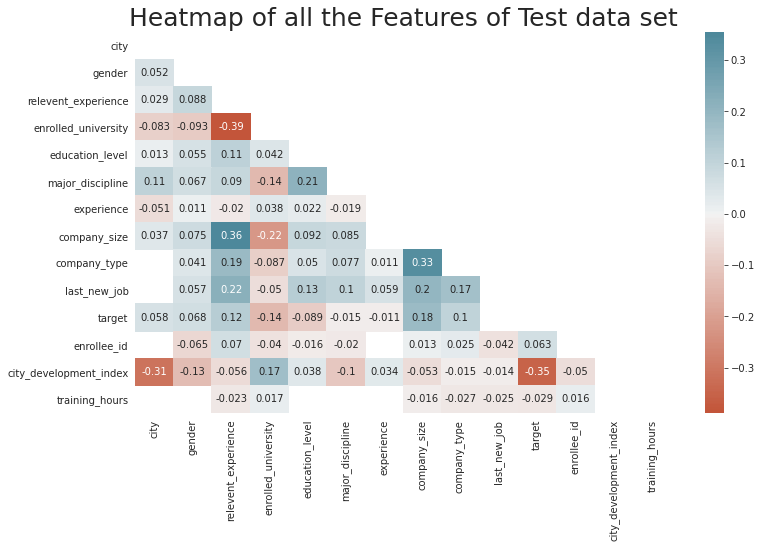

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_test.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = df_test.corr()
sns.heatmap(corr[(corr.abs() > 0.01)], cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Test data set", fontsize = 25)

In [ ]:
df_train['target'].value_counts()



0.0    14381
1.0     4777
Name: target, dtype: int64

In [ ]:
df_test['target'].value_counts()

0    4299
1    1449
Name: target, dtype: int64

In [ ]:
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours', 'target'],
      dtype='object')

In [ ]:
ftrain = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours', 'target']
ftest = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours']

def Definedata():
    # define dataset
    data2=df_train[ftrain]
    X=data2.drop(columns=['target']).values
    y=data2['target'].values
    return X, y

In [ ]:
def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_sample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [ ]:
def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [ ]:
def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = SVMSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [ ]:
def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

hhk

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import seaborn 
import matplotlib.pyplot as plt

def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total career swith = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
    g2.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
    g3.set_ylabel('Total career swith = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score Totalset: {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)

def Featureimportances(models):
    model = models
    model.fit(X_train1,y_train1)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp


Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


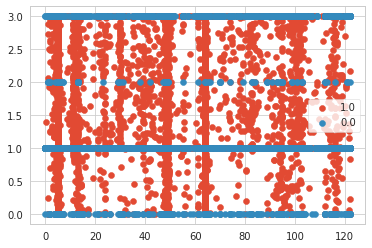

Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


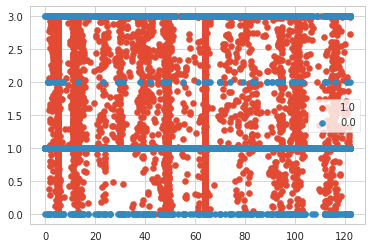

Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


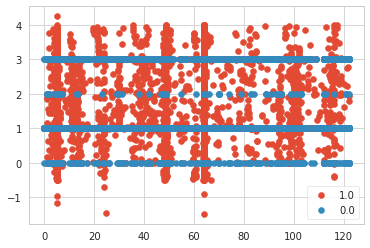

Counter({0.0: 14381, 1.0: 4777})
Counter({0.0: 14381, 1.0: 14236})


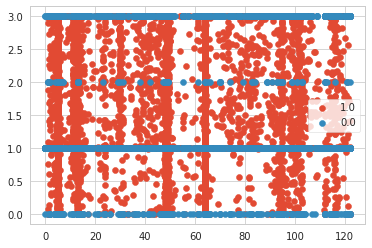

In [ ]:
X_train1, X_test1, y_train1, y_test1 = SMOTE()
X_train2, X_test2, y_train2, y_test2 = BSMOTE()
X_train3, X_test3, y_train3, y_test3 = SMOTESVM()
X_train4, X_test4, y_train4, y_test4 = ADASYN()

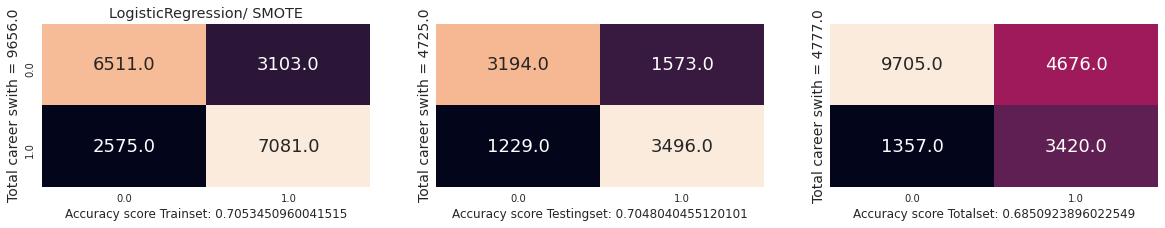

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 1.]))

In [ ]:
title = "LogisticRegression/ SMOTE" 
Models(LogisticRegression(),X_train1, X_test1, y_train1, y_test1, title)